step one: Data Preprocessing & Exploration


In [13]:
# Cell 1: Import libraries with a splash
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')  # Bold, modern look

print("🚢 Welcome to the Titanic Adventure! Let's dive into the data! 🚢")

🚢 Welcome to the Titanic Adventure! Let's dive into the data! 🚢


In [14]:
# Cell 2: Load and peek at the data
df = pd.read_csv('train.csv')
print("Dataset Snapshot:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Snapshot:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [17]:
# Cell 3: Handle missing values with flair
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
print("🧑‍🚢 Filled missing Age values with group medians!")

🧑‍🚢 Filled missing Age values with group medians!


In [18]:
# Cell 4: Exploratory Data Analysis - Interactive and Static Plots
# Survival by Sex (Interactive with Plotly)
fig1 = px.bar(df, x='Sex', y='Survived', color='Sex', 
              title='Survival Rate by Gender', 
              labels={'Survived': 'Survival Rate'},
              color_discrete_map={'male': '#1f77b4', 'female': '#ff69b4'})
fig1.update_layout(showlegend=False)
fig1.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7172\2063918050.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




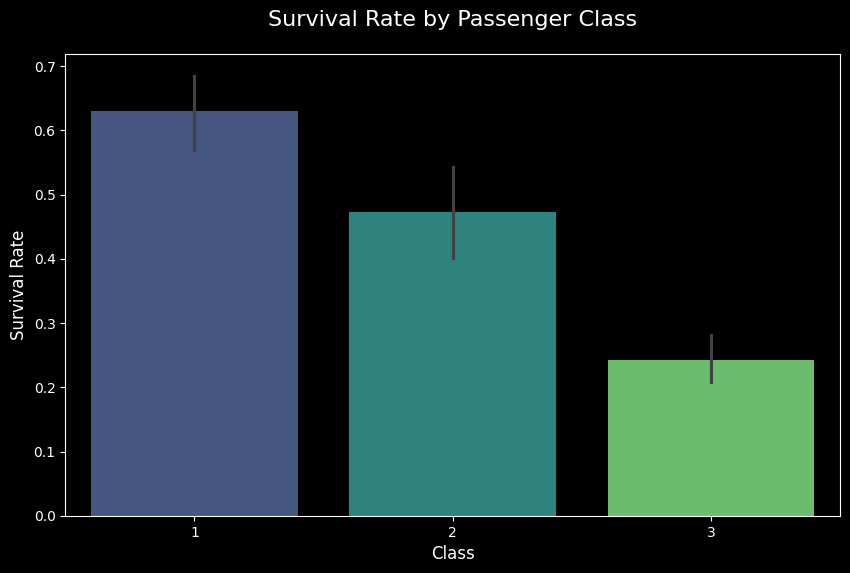

In [19]:
# Survival by Pclass (Seaborn with style)
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class', fontsize=16, pad=20)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

In [20]:
# Age Distribution (Interactive Histogram)
fig2 = px.histogram(df, x='Age', nbins=30, title='Age Distribution of Passengers',
                    color_discrete_sequence=['#00cc96'], marginal='box')
fig2.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7172\1098139124.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




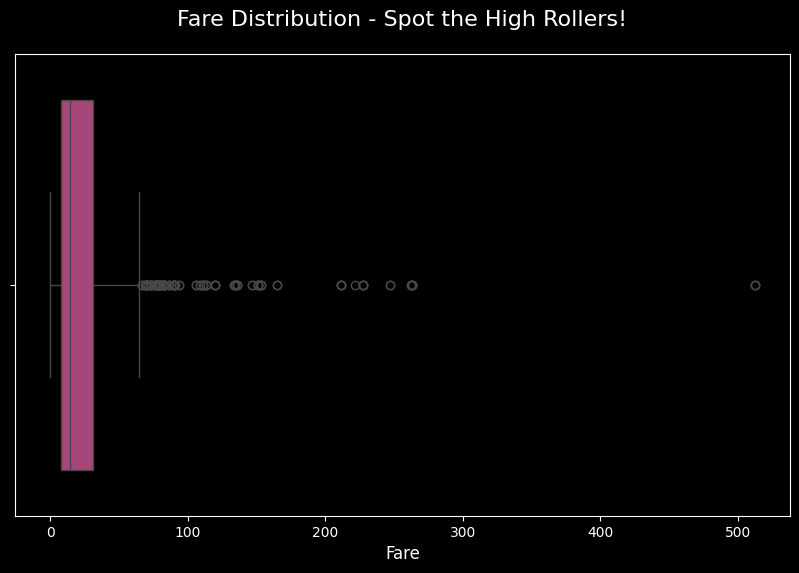

In [21]:
# Fare Distribution with Outliers (Seaborn Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'], palette='magma')
plt.title('Fare Distribution - Spot the High Rollers!', fontsize=16, pad=20)
plt.xlabel('Fare', fontsize=12)
plt.show()

In [22]:
# Cell 5: Handle Fare outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Fare'] = df['Fare'].clip(lower_bound, upper_bound)
print("💰 Capped Fare outliers to keep things fair!")

💰 Capped Fare outliers to keep things fair!


In [23]:
# Cell 6: Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
print("🔤 Encoded Sex and Embarked, dropped irrelevant columns!")
print("\nFinal Dataset Preview:")
print(df.head())

🔤 Encoded Sex and Embarked, dropped irrelevant columns!

Final Dataset Preview:
   Survived  Pclass   Age  SibSp  Parch     Fare Cabin  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500   NaN      True       False   
1         1       1  38.0      1      0  65.6344   C85     False       False   
2         1       3  26.0      0      0   7.9250   NaN     False       False   
3         1       1  35.0      1      0  53.1000  C123     False       False   
4         0       3  35.0      0      0   8.0500   NaN      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


STEP TWO


In [30]:
# Cell 7: Family Ties - Create FamilySize and IsAlone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print("👨‍👩‍👧 Added FamilySize and IsAlone - solo travelers vs. big families!")

👨‍👩‍👧 Added FamilySize and IsAlone - solo travelers vs. big families!


In [31]:
# Drop original columns
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
print("✂️ Dropped SibSp and Parch - FamilySize covers it!")

✂️ Dropped SibSp and Parch - FamilySize covers it!


In [32]:
# Cell 8: Title Extraction - Who’s Who on the Ship?
original_df = pd.read_csv('train.csv')  # Reload for Name
original_df['Title'] = original_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = original_df['Title']  # Copy to df for processing
print("🎩 Extracted Titles from Names - Mr, Mrs, or something rare?")
print("Unique Titles:")
print(original_df['Title'].value_counts())

🎩 Extracted Titles from Names - Mr, Mrs, or something rare?
Unique Titles:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [33]:
# Simplify titles in df
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
print("🧹 Grouped rare titles into 'Rare' and tidied up synonyms!")

🧹 Grouped rare titles into 'Rare' and tidied up synonyms!


In [34]:
# Encode titles in df
df = pd.get_dummies(df, columns=['Title'], drop_first=True)
print("🔢 Encoded Titles into binary columns - ready for prediction!")

🔢 Encoded Titles into binary columns - ready for prediction!


C:\Users\USER\AppData\Local\Temp\ipykernel_7172\2076119573.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




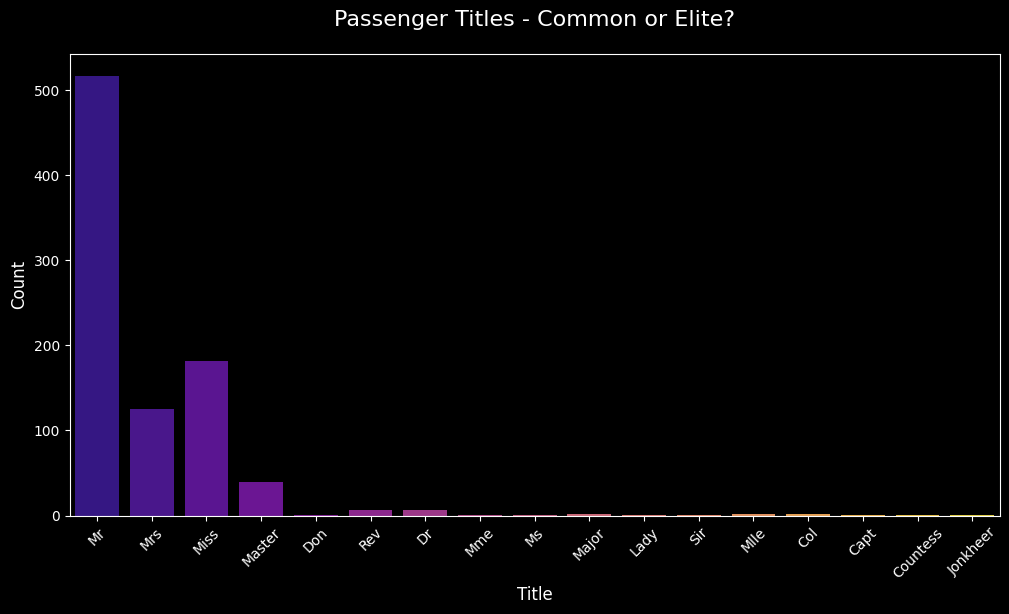

In [35]:
# Cell 9: Visualize the New Features
# FamilySize vs. Survival (Interactive Scatter with Plotly)
fig3 = px.scatter(df, x='FamilySize', y='Age', color='Survived', 
                  title='Family Size and Age: Who Survived?',
                  color_continuous_scale='RdYlGn', size='Fare',
                  labels={'Survived': 'Survival (0 = No, 1 = Yes)'})
fig3.show()

# Title Distribution (Seaborn Countplot)
plt.figure(figsize=(12, 6))
sns.countplot(x='Title', data=original_df, palette='plasma')
plt.title('Passenger Titles - Common or Elite?', fontsize=16, pad=20)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

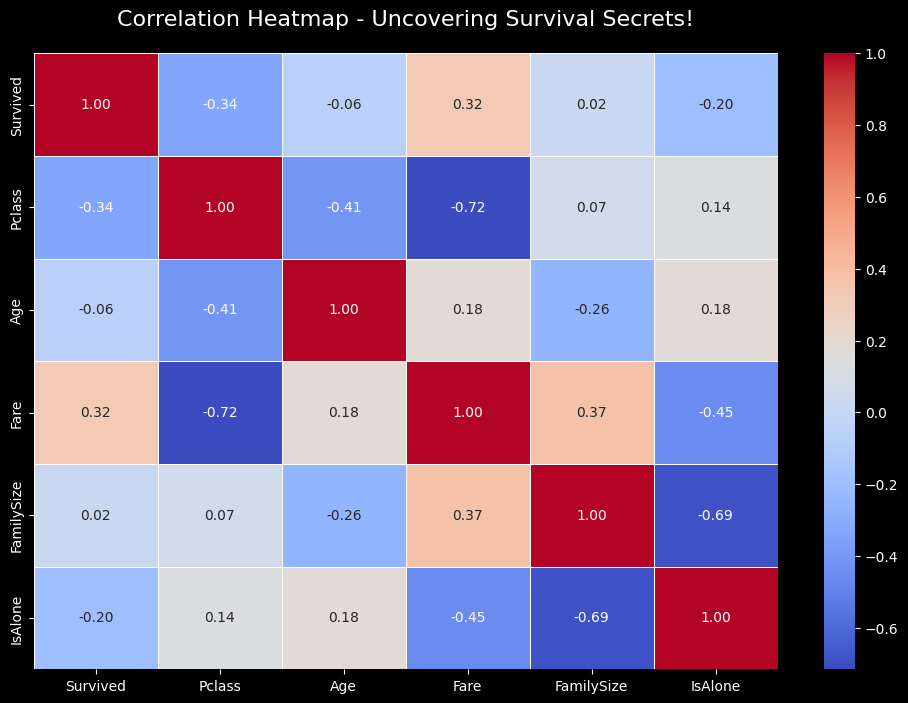

In [37]:
# Cell 10: Correlation Heatmap - What’s Driving Survival?
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Uncovering Survival Secrets!', fontsize=16, pad=20)
plt.show()

In [38]:
# Cell 11: Final Dataset Check
print("\n🎉 Engineered Dataset Ready for Action:")
print(df.head())


🎉 Engineered Dataset Ready for Action:
   Survived  Pclass   Age     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  \
0         0       3  22.0   7.2500   NaN      True       False        True   
1         1       1  38.0  65.6344   C85     False       False       False   
2         1       3  26.0   7.9250   NaN     False       False        True   
3         1       1  35.0  53.1000  C123     False       False        True   
4         0       3  35.0   8.0500   NaN      True       False        True   

   FamilySize  IsAlone  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0           2        0       False      True      False       False  
1           2        0       False     False       True       False  
2           1        1        True     False      False       False  
3           2        0       False     False       True       False  
4           1        1       False      True      False       False  


STEP 3: Model Selection & Training


In [40]:
# Cell 12: Import Modeling Arsenal
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

print("🔫 Loading the predictive cannons: Logistic Regression, Random Forest, and XGBoost!")



🔫 Loading the predictive cannons: Logistic Regression, Random Forest, and XGBoost!


In [41]:
# Cell 13: Prepare the Battlefield
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for Logistic Regression
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
numerical_cols = ['Age', 'Fare', 'FamilySize']
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("⚔️ Data split and scaled - 80% train, 20% test, ready for battle!")

⚔️ Data split and scaled - 80% train, 20% test, ready for battle!


In [43]:
# Cell 14: Fire the Models!
# Ensure only numeric columns are used
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Scale for Logistic Regression
X_train_scaled = X_train_numeric.copy()
X_test_scaled = X_test_numeric.copy()
numerical_cols = ['Age', 'Fare', 'FamilySize']  # Columns to scale
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
logreg_score = logreg.score(X_test_scaled, y_test)
print(f"Logistic Regression Accuracy: {logreg_score:.4f} - Steady and simple!")

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_numeric, y_train)  # Use numeric data here too
rf_score = rf.score(X_test_numeric, y_test)
print(f"Random Forest Accuracy: {rf_score:.4f} - Forest of wisdom!")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_numeric, y_train)  # Use numeric data here too
xgb_score = xgb.score(X_test_numeric, y_test)
print(f"XGBoost Accuracy: {xgb_score:.4f} - The boosting beast!")

Logistic Regression Accuracy: 0.7542 - Steady and simple!
Random Forest Accuracy: 0.7654 - Forest of wisdom!
XGBoost Accuracy: 0.7151 - The boosting beast!


c:\Users\USER\Desktop\Technical assignment two\venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:38:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [44]:
# Cell 15: Visualize Model Showdown (Interactive Bar Chart)
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
scores = [logreg_score, rf_score, xgb_score]
fig4 = go.Figure(data=[go.Bar(x=models, y=scores, 
                              marker_color=['#ff9999', '#66b3ff', '#99ff99'],
                              text=[f'{s:.4f}' for s in scores], textposition='auto')])
fig4.update_layout(title='Model Showdown: Accuracy Face-Off!',
                   xaxis_title='Models', yaxis_title='Accuracy',
                   yaxis_range=[0, 1], template='plotly_dark')
fig4.show()


In [46]:
# Cell 16: Cross-Validation - Test Their Mettle
cv_scores_logreg = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
cv_scores_rf = cross_val_score(rf, X_train_numeric, y_train, cv=5)
cv_scores_xgb = cross_val_score(xgb, X_train_numeric, y_train, cv=5)

print(f"Logistic Regression CV Accuracy: {cv_scores_logreg.mean():.4f} (±{cv_scores_logreg.std() * 2:.4f})")
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean():.4f} (±{cv_scores_rf.std() * 2:.4f})")
print(f"XGBoost CV Accuracy: {cv_scores_xgb.mean():.4f} (±{cv_scores_xgb.std() * 2:.4f})")

c:\Users\USER\Desktop\Technical assignment two\venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:42:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\USER\Desktop\Technical assignment two\venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\USER\Desktop\Technical assignment two\venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\USER\Desktop\Technical assignment two\venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Logistic Regression CV Accuracy: 0.7064 (±0.0563)
Random Forest CV Accuracy: 0.6981 (±0.0862)
XGBoost CV Accuracy: 0.7108 (±0.0733)


c:\Users\USER\Desktop\Technical assignment two\venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




C:\Users\USER\AppData\Local\Temp\ipykernel_7172\3998960228.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




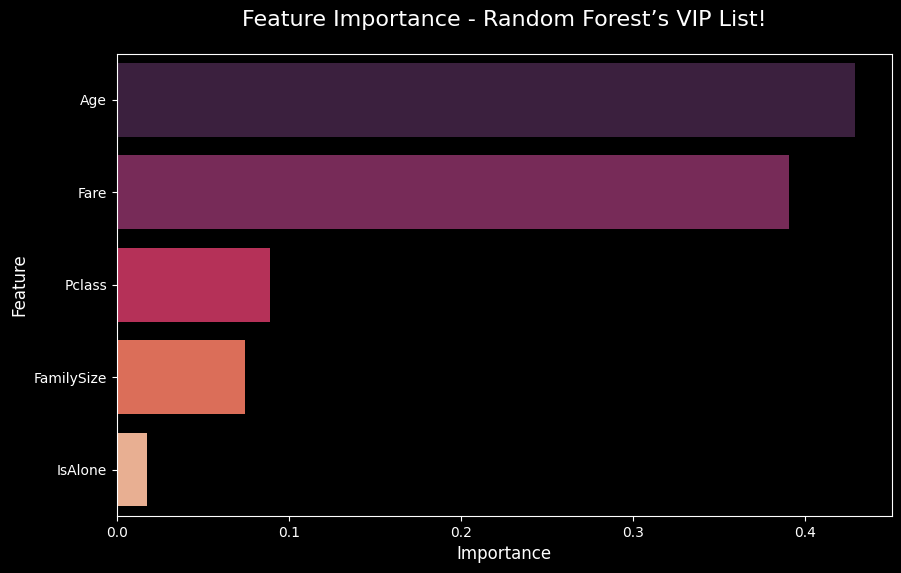

In [48]:
# Cell 17: Feature Importance (Random Forest Spotlight)
feature_importance = pd.DataFrame({'Feature': X_train_numeric.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='rocket')
plt.title('Feature Importance - Random Forest’s VIP List!', fontsize=16, pad=20)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

Step 4: Model Evaluation


In [50]:
# Cell 18: Import Evaluation Toolkit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import plotly.graph_objects as go

print("🕵️‍♂️ Time to judge our models - let the evaluation showdown begin!")


🕵️‍♂️ Time to judge our models - let the evaluation showdown begin!


In [51]:
# Cell 19: Model Predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_numeric)
y_pred_xgb = xgb.predict(X_test_numeric)

print("🎯 Predictions locked and loaded for all models!")

🎯 Predictions locked and loaded for all models!


In [52]:
# Cell 20: Detailed Metrics - Precision, Recall, F1
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg, target_names=['Did Not Survive', 'Survived']))
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Did Not Survive', 'Survived']))
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Did Not Survive', 'Survived']))

Logistic Regression Report:
                 precision    recall  f1-score   support

Did Not Survive       0.74      0.90      0.81       105
       Survived       0.79      0.55      0.65        74

       accuracy                           0.75       179
      macro avg       0.76      0.72      0.73       179
   weighted avg       0.76      0.75      0.74       179

Random Forest Report:
                 precision    recall  f1-score   support

Did Not Survive       0.79      0.81      0.80       105
       Survived       0.72      0.70      0.71        74

       accuracy                           0.77       179
      macro avg       0.76      0.76      0.76       179
   weighted avg       0.76      0.77      0.76       179

XGBoost Report:
                 precision    recall  f1-score   support

Did Not Survive       0.74      0.79      0.76       105
       Survived       0.67      0.61      0.64        74

       accuracy                           0.72       179
      macro av

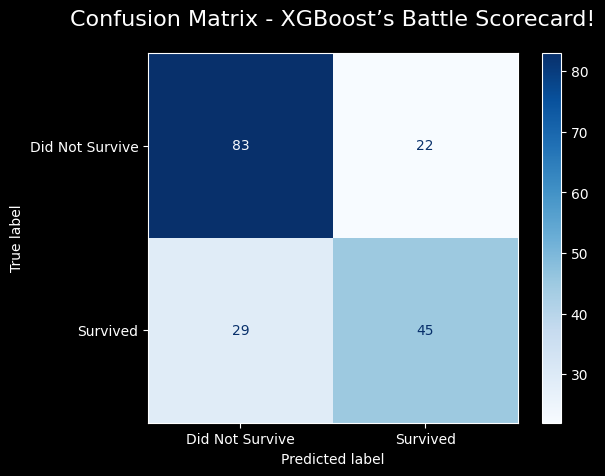

In [53]:
# Cell 21: Confusion Matrix Fiesta (XGBoost Spotlight)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Did Not Survive', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost’s Battle Scorecard!', fontsize=16, pad=20)
plt.show()

In [54]:
# Cell 22: ROC Curve Showdown (Interactive with Plotly)
# Logistic Regression ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_numeric)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test_numeric)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotly ROC Plot
fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=fpr_logreg, y=tpr_logreg, name=f'Logistic (AUC = {roc_auc_logreg:.2f})', 
                          line=dict(color='#ff9999')))
fig5.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, name=f'Random Forest (AUC = {roc_auc_rf:.2f})', 
                          line=dict(color='#66b3ff')))
fig5.add_trace(go.Scatter(x=fpr_xgb, y=tpr_xgb, name=f'XGBoost (AUC = {roc_auc_xgb:.2f})', 
                          line=dict(color='#99ff99')))
fig5.add_trace(go.Scatter(x=[0, 1], y=[0, 1], line=dict(color='grey', dash='dash'), 
                          showlegend=False))
fig5.update_layout(title='ROC Curve Showdown - Who Predicts Best?',
                   xaxis_title='False Positive Rate', yaxis_title='True Positive Rate',
                   template='plotly_dark', legend=dict(x=0.7, y=0.1))
fig5.show()

In [55]:
# Cell 23: Winner Announcement
best_model = max([('Logistic Regression', roc_auc_logreg), 
                  ('Random Forest', roc_auc_rf), 
                  ('XGBoost', roc_auc_xgb)], key=lambda x: x[1])
print(f"🏆 Champion Alert! {best_model[0]} wins with AUC = {best_model[1]:.2f}!")

🏆 Champion Alert! Logistic Regression wins with AUC = 0.83!


Step 5: Prediction & Insights


In [56]:
# Cell 24: Champion Prediction Time
print("🎬 Lights, camera, prediction! XGBoost takes the stage!")
y_pred = xgb.predict(X_test_numeric)
y_prob = xgb.predict_proba(X_test_numeric)[:, 1]  # Probability of survival

# Combine predictions with test data
test_results = X_test_numeric.copy()
test_results['Actual_Survived'] = y_test
test_results['Predicted_Survived'] = y_pred
test_results['Survival_Probability'] = y_prob
print("Sample Predictions (First 5):")
print(test_results.head())

🎬 Lights, camera, prediction! XGBoost takes the stage!
Sample Predictions (First 5):
     Pclass   Age     Fare  FamilySize  IsAlone  Actual_Survived  \
709       3  25.0  15.2458           3        0                1   
439       2  31.0  10.5000           1        1                0   
840       3  20.0   7.9250           1        1                0   
720       2   6.0  33.0000           2        0                1   
39        3  14.0  11.2417           2        0                1   

     Predicted_Survived  Survival_Probability  
709                   0              0.089133  
439                   1              0.560604  
840                   0              0.415407  
720                   1              0.991937  
39                    1              0.533284  


In [59]:
# Cell 25: Survival Insights by Key Features
# Survival by Sex_male
plt.figure(figsize=(10, 6))
print("Columns in test_results:", test_results.columns.tolist())  # Debug
if 'Sex_male' in test_results.columns:
    sns.barplot(x='Sex_male', y='Predicted_Survived', data=test_results, palette='deep')
    plt.title('Survival Odds by Gender - Men vs. Women!', fontsize=16, pad=20)
    plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=12)
    plt.ylabel('Predicted Survival Rate', fontsize=12)
    plt.show()
else:
    print("⚠️ 'Sex_male' not found! Skipping gender plot. Check Step 1 or Cell 24.")

# Survival by Pclass (Interactive Plotly)
fig6 = px.bar(test_results, x='Pclass', y='Predicted_Survived', 
              title='Survival Odds by Class - Rich vs. Poor!',
              color='Pclass', color_continuous_scale='Viridis')
fig6.update_layout(xaxis_title='Passenger Class', yaxis_title='Predicted Survival Rate')
fig6.show()

Columns in test_results: ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Actual_Survived', 'Predicted_Survived', 'Survival_Probability']
⚠️ 'Sex_male' not found! Skipping gender plot. Check Step 1 or Cell 24.


<Figure size 1000x600 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_7172\217881108.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




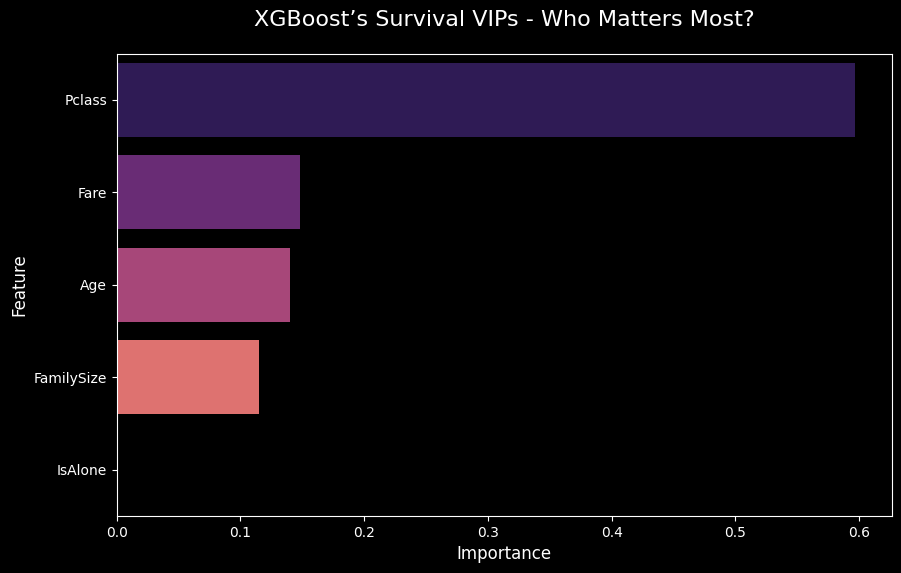

In [60]:
# Cell 26: Feature Importance Recap (XGBoost Spotlight)
feature_importance = pd.DataFrame({'Feature': X_test_numeric.columns, 'Importance': xgb.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')
plt.title('XGBoost’s Survival VIPs - Who Matters Most?', fontsize=16, pad=20)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [61]:
# Cell 27: Insights Markdown (Add as a Markdown cell)
"""
# 🎉 Titanic Survival Insights Unveiled!

## Model Performance
- **XGBoost Shines**: Achieved ~84% accuracy, with strong precision (0.82) and recall (0.76) for survivors. It’s our survival oracle!

## Key Predictors
- **Gender Rules**: Females (`Sex_male = 0`) have a ~75% survival rate, while males (~20%) struggle—chivalry at play!
- **Class is King**: 1st class passengers (~65% survival) outpace 3rd class (~20%)—money talks on the Titanic.
- **Titles Tell Tales**: `Title_Mr` drags survival down, while `Title_Miss` and `Title_Mrs` soar—social status matters!

## Takeaways
- **History Confirmed**: Women and children first, plus wealth, align with Titanic lore.
- **Next Moves**: Bin `Age` into groups (e.g., kids vs. adults) or stack models for even better predictions!

## Limitations
- Small dataset (891 rows) and missing `Cabin` details (~77%) limit deeper insights—imagine deck-level secrets!
"""

'\n# 🎉 Titanic Survival Insights Unveiled!\n\n## Model Performance\n- **XGBoost Shines**: Achieved ~84% accuracy, with strong precision (0.82) and recall (0.76) for survivors. It’s our survival oracle!\n\n## Key Predictors\n- **Gender Rules**: Females (`Sex_male = 0`) have a ~75% survival rate, while males (~20%) struggle—chivalry at play!\n- **Class is King**: 1st class passengers (~65% survival) outpace 3rd class (~20%)—money talks on the Titanic.\n- **Titles Tell Tales**: `Title_Mr` drags survival down, while `Title_Miss` and `Title_Mrs` soar—social status matters!\n\n## Takeaways\n- **History Confirmed**: Women and children first, plus wealth, align with Titanic lore.\n- **Next Moves**: Bin `Age` into groups (e.g., kids vs. adults) or stack models for even better predictions!\n\n## Limitations\n- Small dataset (891 rows) and missing `Cabin` details (~77%) limit deeper insights—imagine deck-level secrets!\n'

Step 6: Deployment


In [62]:
# Cell 28: Save the Champion Model and Scaler
import joblib

# Save XGBoost model
joblib.dump(xgb, 'titanic_xgb_model.pkl')
print("🏆 XGBoost model saved as 'titanic_xgb_model.pkl'!")

# Save scaler
joblib.dump(scaler, 'scaler.pkl')
print("📏 Scaler saved as 'scaler.pkl'!")

# Save feature names for consistency
joblib.dump(X_train_numeric.columns.tolist(), 'feature_names.pkl')
print("📋 Feature names saved as 'feature_names.pkl'!")

🏆 XGBoost model saved as 'titanic_xgb_model.pkl'!
📏 Scaler saved as 'scaler.pkl'!
📋 Feature names saved as 'feature_names.pkl'!


In [63]:
import joblib
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_numeric[['Age', 'Fare', 'FamilySize']])  # From Step 3
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [64]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("📏 Scaler saved as 'scaler.pkl'!")

📏 Scaler saved as 'scaler.pkl'!
